# 911 Calls Exploratory Data Analysis

For this project I will be analyzing the dataset containing 911 calls data.

Dataset can be obtained from [Kaggle](https://www.kaggle.com/mchirico/montcoalert)

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

By the end of this analysis, I hope to find out the following:
1. Top 911 calls by department and reasons
2. If there are certain times during day / week or month that the number of calls are higher 
3. If there are any particular townships that have an unusually high number of calls

### Data and Setup

___
** Import libraries **

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read csv file and create dataframe **

In [229]:
df = pd.read_csv('911.csv')

** Check the data **

In [230]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [231]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


Looks like there are some missing values:
1. zip : 12855 NaNs
2. twp : 43 NaNs 
3. addr : 519 NaNs 

As there are **only 43 missing values** for twp we can ignore these rows in our analysis of calls by location later. 
We will not be using the zip and addr columns in our analysis. 

## Deeper look at the data and visualizations

** First lets see the top 5 zipcodes for 911 calls **

In [232]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Now the top 5 townships (twp) for 911 calls **

In [233]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Lets make a plot for the top 10 townships (twp) for 911 calls **

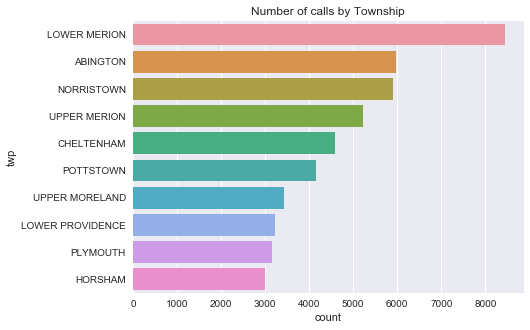

In [234]:
fig, ax= plt.subplots(figsize=(7,5))
sns.countplot(y="twp", data=df,
              order=df.twp.value_counts().iloc[:10].index)
plt.title('Number of calls by Township')

In [235]:
df['title'].loc[df['twp']=='LOWER MERION'].value_counts().head(10)

Traffic: VEHICLE ACCIDENT -       2324
Traffic: DISABLED VEHICLE -        787
Fire: FIRE ALARM                   772
Traffic: ROAD OBSTRUCTION -        406
EMS: VEHICLE ACCIDENT              350
EMS: FALL VICTIM                   342
EMS: CARDIAC EMERGENCY             292
EMS: RESPIRATORY EMERGENCY         263
EMS: HEAD INJURY                   219
EMS: UNKNOWN MEDICAL EMERGENCY     169
Name: title, dtype: int64

Looks like Lower Merion has a high number of vehicle accidents! 

** Lets look at the 'title' column and check how many unique title codes there are **

In [236]:
df['title'].nunique()

110

** Looks like there are 110 unique kinds of calls. Lets see the top 10 reasons for calls (note that here the calls are still combined with the departments - hence there can be the same kind of reasons called into different departments. **

In [237]:
df['title'].value_counts().head(10)

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3144
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: title, dtype: int64

** It would be interesting to see only the reasons for the calls irrespective of the departments which we will do next. **

### Feature Engineering

** As we have seen there seem to be different departments and reasons combined in the title column. Lets split this data into Department and Reason which will give us a clearer picture. ** 

In [238]:
df['Department'] = df['title'].apply(lambda x : x.split(':')[0])
df['Reason'] = df['title'].apply(lambda x : x.split(':')[1])

** We can now see which department gets the most number of 911 calls **

EMS        48877
Traffic    35695
Fire       14920
Name: Department, dtype: int64


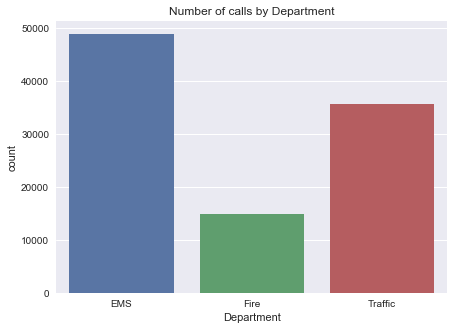

In [239]:
print(df['Department'].value_counts())
fig, ax= plt.subplots(figsize=(7,5))
sns.countplot(x='Department', data=df)
plt.title('Number of calls by Department')

In [240]:
df['Reason'].loc[df['Department']=='EMS'].value_counts().head(10)

 RESPIRATORY EMERGENCY        5112
 CARDIAC EMERGENCY            5012
 FALL VICTIM                  4863
 VEHICLE ACCIDENT             3935
 SUBJECT IN PAIN              2687
 HEAD INJURY                  2631
 UNKNOWN MEDICAL EMERGENCY    1873
 SYNCOPAL EPISODE             1717
 SEIZURES                     1630
 GENERAL WEAKNESS             1464
Name: Reason, dtype: int64

EMS gets the most number of calls, followed by Traffic. Looks like the Fire Department doesn't get too many calls comparatively. 
Looks like the top calls to EMS are for Respiratory and Cardiac Emergencies. 

Now lets see how the calls vary by departments and reasons. 

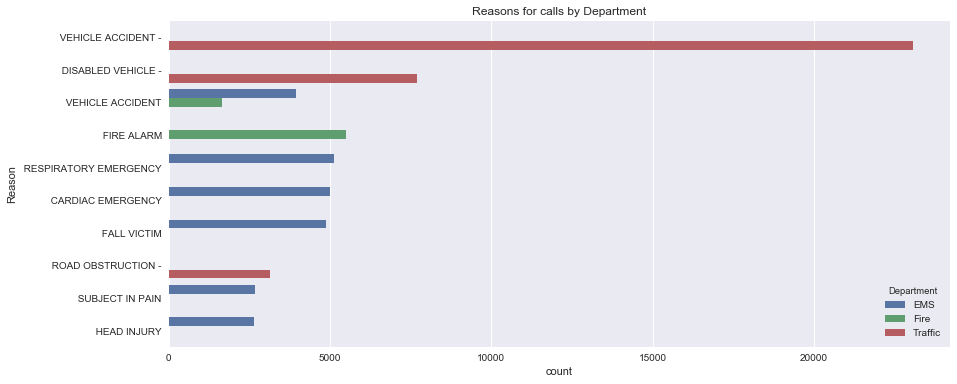

In [241]:
fig, ax= plt.subplots(figsize=(14,6))
sns.countplot(y="Reason", data=df, hue='Department',
              order=df.Reason.value_counts().iloc[:10].index)
plt.title('Reasons for calls by Department')

___
** Now let us begin to focus on time information. We will analyze when there are a high number of 911 calls. Lets start by inspecting the timeStamp column **

In [242]:
type(df['timeStamp'][0])

str

** The timestamps are strings. We will use pd.to_datetime to convert the column from strings to DateTime objects. **

In [243]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 11 columns):
lat           99492 non-null float64
lng           99492 non-null float64
desc          99492 non-null object
zip           86637 non-null float64
title         99492 non-null object
timeStamp     99492 non-null datetime64[ns]
twp           99449 non-null object
addr          98973 non-null object
e             99492 non-null int64
Department    99492 non-null object
Reason        99492 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 8.3+ MB


** We will create 3 new columns called Hour, Month, and Day of Week from the timeStamp column.**

In [244]:
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['Day of Week'] = df['timeStamp'].apply(lambda x : x.dayofweek)
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason,Hour,Day of Week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,3,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,3,12


** We will definitely change the Day of the Week from the integers to their corresponding string values **


In [256]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason,Hour,Day of Week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,Thu,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,Thu,12


** Now we will use these new columns to analyze the calls further. **
use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. 

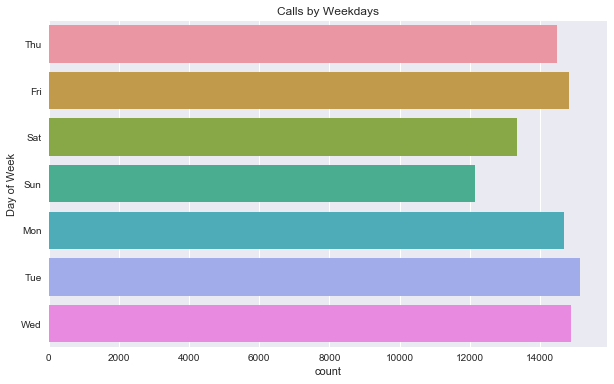

In [276]:
fig, ax= plt.subplots(figsize=(10,6))
sns.countplot(y='Day of Week', data=df)
plt.title('Calls by Weekdays')

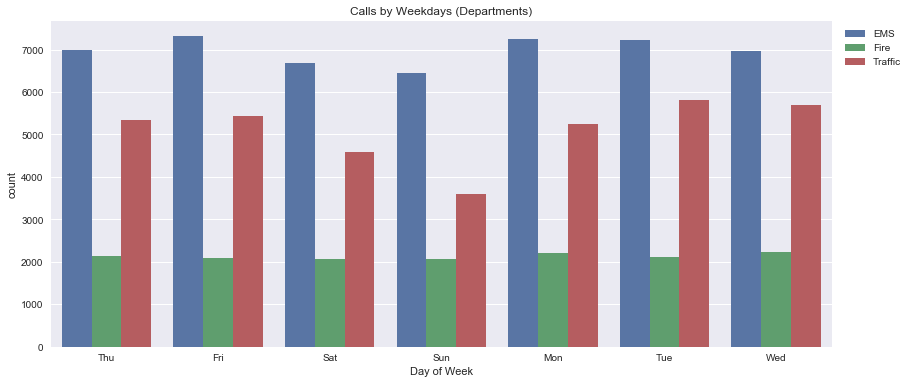

In [264]:
fig, ax= plt.subplots(figsize=(14,6))
sns.countplot(x='Day of Week', data=df, hue='Department')
plt.legend(bbox_to_anchor=(1.1,1))
plt.title('Calls by Weekdays (Departments)')

Ok, it looks like the number of calls throughout the weekdays are close to each other. The weekend seems to have fewer number of calls. Traffic calls definitely seem less on the weekends probably due to people not going to work. So do the EMS calls.

**Now lets review the same by Month:**

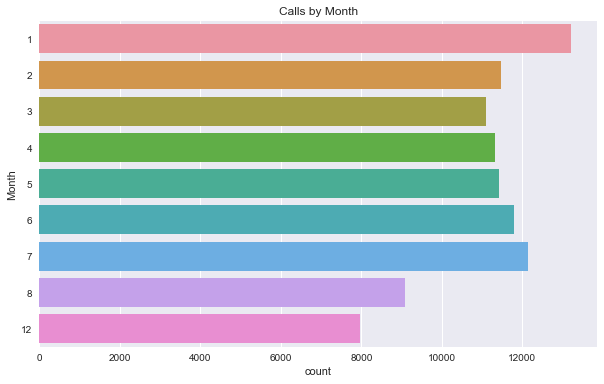

In [318]:
fig, ax= plt.subplots(figsize=(10,6))
sns.countplot(y='Month', data=df)
plt.title('Calls by Month')

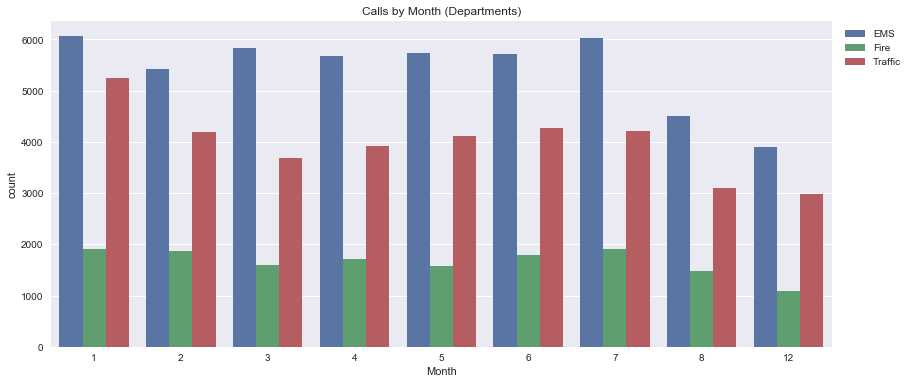

In [266]:
fig, ax= plt.subplots(figsize=(14,6))
sns.countplot(x='Month', data=df, hue='Department')
plt.legend(bbox_to_anchor=(1.1,1))
plt.title('Calls by Month (Departments)')

January has the highest number of calls. And Traffic calls seem to dominate this month. December has the lowest - is this due to people going away for the holidays? And January traffic calls can perhaps be attributed to the cold snowy weather. The trend seems to decrease over the following months and then picks up during the summmer months from May to July with a slight jump in the EMS calls in July - perhaps this can be attributed to more people / children being out and about during the height of summer?

But we should note here that the months from September to November are missing. Let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months.

In [351]:
byMonth = pd.groupby(df,by='Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason,Hour,Day of Week,Date
Month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


** Now lets create a simple plot off of the dataframe indicating the count of calls per month. **

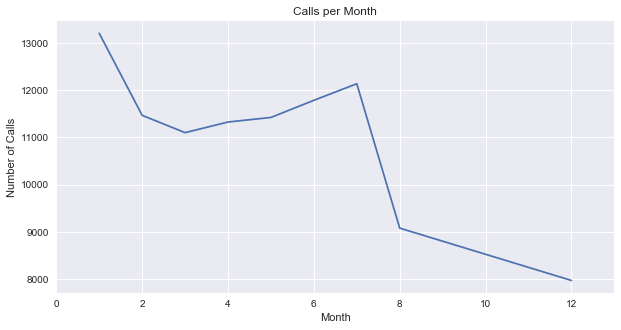

In [358]:
fig, ax= plt.subplots(figsize=(10,5))
byMonth.plot(y=['e'], ax=ax, legend=False)
plt.xlim([0,13])
plt.title('Calls per Month')
plt.ylabel('Number of Calls')

** Now lets see if we can use seaborn's lmplot() to create a linear fit on the number of calls per month. **

In [359]:
byMonth.reset_index(inplace=True)
byMonth.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason,Hour,Day of Week,Date
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423


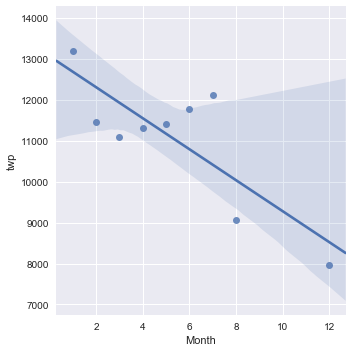

In [360]:
sns.lmplot(x='Month', y='twp', data=byMonth)

It seems that there are fewer emergency calls during the holiday season.

**Lets make a new column called 'Date' that contains the date from the timeStamp column. ** 

In [272]:
df['Date'] = df['timeStamp'].apply(lambda x : x.date())
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason,Hour,Day of Week,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,Thu,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,Thu,12,2015-12-10


** Lets plot the counts of 911 calls by dates available **

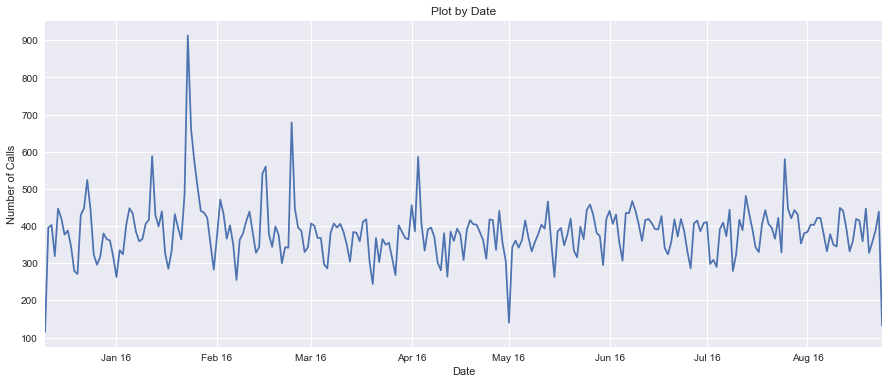

In [277]:
fig, ax = plt.subplots(figsize=(15,6))
pd.groupby(df,'Date').count().plot(y='e', ax=ax)

plt.title('Plot by Date')
plt.ylabel('Number of Calls')
ax.legend_.remove()

import matplotlib.dates as dates
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %y'))

** As we noticed before there is a big spike in the 911 calls from mid to end of January. Now lets recreate this plot but create 3 separate plots for each of the departments **

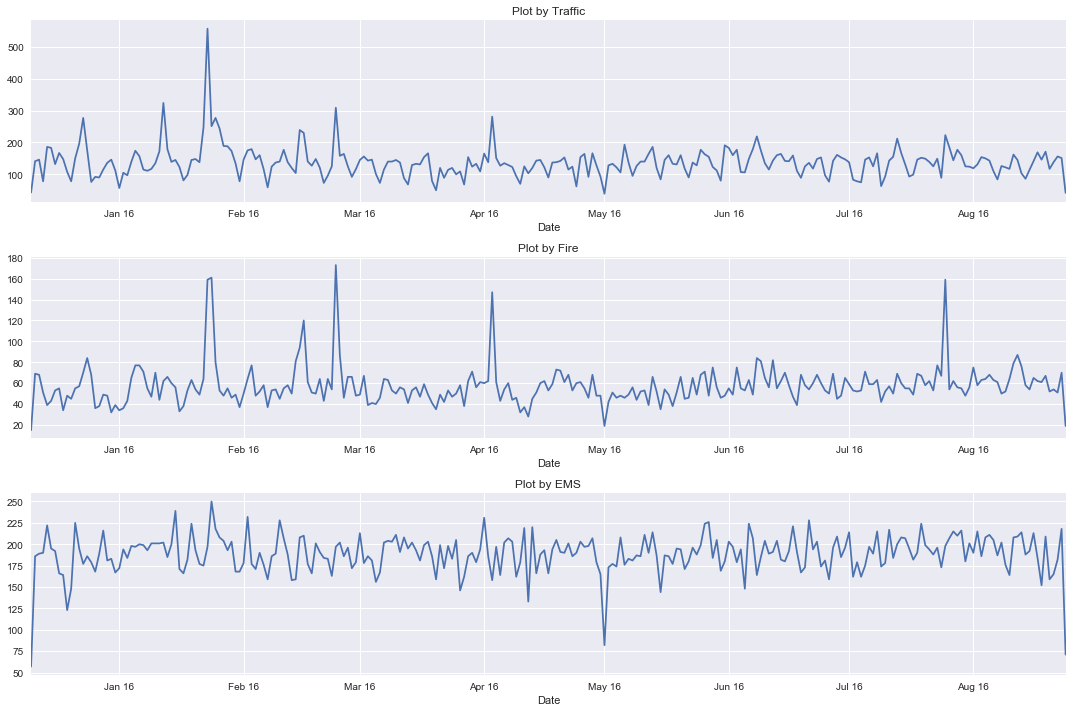

In [319]:
fig, ax = plt.subplots(3,1,figsize=(15,10))
depts = ['Traffic', 'Fire', 'EMS']
for i,j in enumerate(depts):
    df[df['Department']==j].groupby('Date').count().plot(y='e', ax=ax[i], title='Plot by '+j, legend=False)
    ax[i].xaxis.set_major_formatter(dates.DateFormatter('%b %y'))

plt.tight_layout()

Looks like the plots above reiterate what we have found so far. We should also notice that there is a spike in July for calls to the Fire Department. April has a spike as well.

In [347]:
df['Reason'].loc[df['Month']==4].value_counts().head(10)

 VEHICLE ACCIDENT -       2574
 DISABLED VEHICLE -        716
 VEHICLE ACCIDENT          635
 CARDIAC EMERGENCY         625
 RESPIRATORY EMERGENCY     599
 FIRE ALARM                592
 FALL VICTIM               532
 ROAD OBSTRUCTION -        464
 SUBJECT IN PAIN           317
 HEAD INJURY               306
Name: Reason, dtype: int64

April seems to have a high number of vehicle accidents!
____
** Now let's move on to creating  heatmaps with seaborn. We will need to restructure the data in order to do this.**

In [337]:
byHour = df.groupby(['Day of Week', 'Hour']).count()['e'].unstack()
byHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Now create a HeatMap using this new DataFrame. **

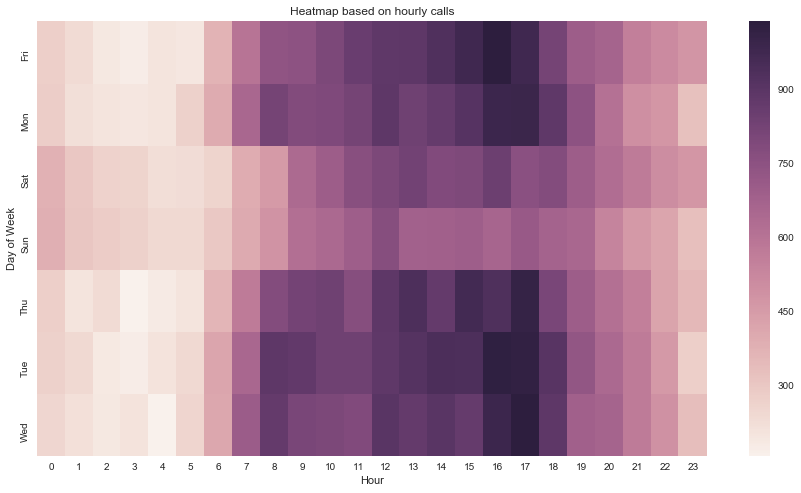

In [340]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(byHour)
plt.title('Heatmap based on hourly calls')

As we have seen before calls seem more frequent during the weekdays and looks like the number of calls increase considerably around the 4-6 pm - which is the end of work days! 

** Now lets check the same for Month instead of Hours **

In [344]:
byMonth = df.groupby(['Day of Week', 'Month']).count()['e'].unstack()
byMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


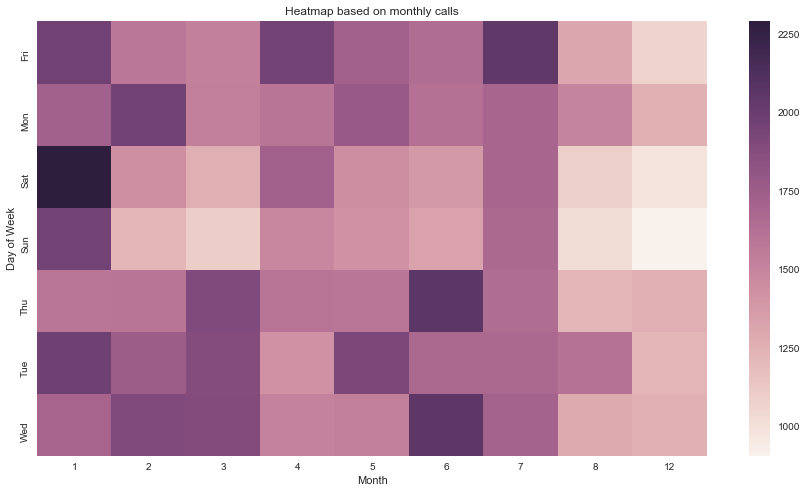

In [346]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(byMonth)
plt.title('Heatmap based on monthly calls')

**There's something interesting this heatmap reveals - we have noted before that the weekends don't seem to have that many calls in comparison to the weekdays. But this heatmap reveals that in January - Saturday seems to have a high number of calls! **


This brings me the the end of this exploratory analysis project. We have been able to get some great insights from the data and have answered the three queries we mapped out in the beginning of this project.